In [32]:
import pandas as pd
import glob
import os
import matplotlib as plt

# Con esto se hace merge

In [3]:
# Ruta a la carpeta que contiene los archivos
ruta = 'Data/ExtraccionDomiVersionFinal/'

# Obtener todos los archivos que coincidan con el patrón
archivos = glob.glob(os.path.join(ruta, 'ListaCobroDetalle20*.csv'))

# Leer y concatenar todos los archivos en un solo DataFrame
df_detalle = pd.concat([pd.read_csv(archivo) for archivo in archivos], ignore_index=True)

df_lista = pd.read_csv(os.path.join(ruta, 'ListaCobro.csv'))
df_emisora = pd.read_csv(os.path.join(ruta, 'ListaCobroEmisora.csv'))
df_creditos = pd.read_csv(os.path.join(ruta, 'Capital_Pagare_FechaAperturaCredito.csv'))

C:\Users\chall\AppData\Local\Temp\ipykernel_21840\3636483435.py:8: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_detalle = pd.concat([pd.read_csv(archivo) for archivo in archivos], ignore_index=True)


In [4]:
df_detalle = df_detalle.merge(
    df_lista[['idListaCobro', 'fechaEnvioCobro']],
    on='idListaCobro',
    how='left'
)

df_detalle = df_detalle.merge(
    df_emisora[['idListaCobro', 'idEmisora']],
    on='idListaCobro',
    how='left'
)

df_detalle = df_detalle.merge(
    df_creditos[['idcredito', 'pagare', 'capital', 'fechaAperturaCredito']],
    left_on='idCredito',
    right_on='idcredito',
    how='left'
)

df_detalle.drop(columns='idcredito', inplace=True)


In [5]:
df_detalle.to_csv('Data/ExtraccionDomiVersionFinal/ListaCobroDetalleFinal.csv', index=False)
df_detalle.head()

,idListaCobro,idCredito,consecutivoCobro,idBanco,montoExigible,montoCobrar,montoCobrado,fechaCobroBanco,idRespuestaBanco,fechaEnvioCobro,idEmisora,pagare,capital,fechaAperturaCredito
0,100613,83021,27169966,2,572.24,572.24,0.0,NaN,04,30/09/2022,51,44634.33,21000.0,30/12/2013
1,100613,87227,27169937,2,517.74,517.74,0.0,NaN,04,30/09/2022,51,40383.33,19000.0,12/02/2014
2,100613,103785,27169946,2,681.23,681.23,0.0,NaN,04,30/09/2022,51,53135.94,25000.0,19/02/2014
3,100613,110463,27169969,2,572.24,572.24,0.0,NaN,04,30/09/2022,51,44634.33,21000.0,26/02/2014
4,100613,113755,27169948,2,340.62,340.62,0.0,NaN,04,30/09/2022,51,26567.97,12500.0,21/03/2014


# Aquí esa el merge

Reiniciar y solo leer un dataframe

In [14]:
# Ruta a la carpeta que contiene los archivos
ruta = 'Data/ExtraccionDomiVersionFinal/'
df_lista = pd.read_csv(os.path.join(ruta, 'ListaCobroDetalleFinal.csv'))

C:\Users\chall\AppData\Local\Temp\ipykernel_9536\2748886643.py:3: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  df_lista = pd.read_csv(os.path.join(ruta, 'ListaCobroDetalleFinal.csv'))


In [15]:
df_lista.head(10)

,idListaCobro,idCredito,consecutivoCobro,idBanco,montoExigible,montoCobrar,montoCobrado,fechaCobroBanco,idRespuestaBanco,fechaEnvioCobro,idEmisora,pagare,capital,fechaAperturaCredito
0,100613,83021,27169966,2,572.24,572.24,0.0,NaN,04,30/09/2022,51,44634.33,21000.0,30/12/2013
1,100613,87227,27169937,2,517.74,517.74,0.0,NaN,04,30/09/2022,51,40383.33,19000.0,12/02/2014
2,100613,103785,27169946,2,681.23,681.23,0.0,NaN,04,30/09/2022,51,53135.94,25000.0,19/02/2014
3,100613,110463,27169969,2,572.24,572.24,0.0,NaN,04,30/09/2022,51,44634.33,21000.0,26/02/2014
4,100613,113755,27169948,2,340.62,340.62,0.0,NaN,04,30/09/2022,51,26567.97,12500.0,21/03/2014
5,100613,118237,27169957,2,272.50,272.50,0.0,NaN,04,30/09/2022,51,21254.61,10000.0,22/04/2014
6,100613,136004,27169958,2,361.06,361.06,0.0,NaN,04,30/09/2022,51,28162.29,13250.0,26/08/2014
7,100613,137382,27169934,2,393.94,393.94,0.0,NaN,04,30/09/2022,51,51212.20,18160.0,01/09/2014
8,100613,137885,27169970,2,289.02,289.02,0.0,NaN,04,30/09/2022,51,37571.95,13323.0,12/09/2014
9,100613,149399,27169968,2,572.24,572.24,0.0,NaN,04,30/09/2022,51,44634.33,21000.0,13/10/2014


In [27]:
df_lista['fechaEnvioCobro'] = pd.to_datetime(df_lista['fechaEnvioCobro'], errors='coerce')

df_lista = df_lista.sort_values(by='fechaEnvioCobro')

grupo_cliente = df_lista.groupby('idCredito')
grupo_cliente.head(10)


,idListaCobro,idCredito,consecutivoCobro,idBanco,montoExigible,montoCobrar,montoCobrado,fechaCobroBanco,idRespuestaBanco,fechaEnvioCobro,idEmisora,pagare,capital,fechaAperturaCredito
52429,79678,165493,23794403,21,579.20,579.20,0.00,NaN,DD00028,2022-01-04,20,75295.35,26700.0,24/02/2015
52412,79746,513736,23802602,21,998.47,998.47,0.00,NaN,DD00031,2022-01-04,20,77880.66,45112.0,26/09/2019
52413,79678,67455,23794389,21,735.73,735.73,0.00,NaN,DD00028,2022-01-04,20,57386.94,27000.0,06/09/2013
52414,79678,70077,23794390,21,313.37,313.37,0.00,NaN,DD00028,2022-01-04,20,24442.47,11500.0,24/09/2013
52415,79678,70845,23794391,21,708.48,708.48,0.00,NaN,DD00028,2022-01-04,20,55261.44,26000.0,26/09/2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10056835,162249,755156,44290789,2,1620.87,1620.87,1620.87,21/05/2025,0.0,2025-05-21,5,84285.24,29999.0,02/05/2025
10056836,162249,755287,44290790,2,3119.95,3119.95,0.00,NaN,4.0,2025-05-21,5,162237.40,57744.0,03/05/2025
10056837,162249,755859,44290791,2,2928.79,2928.79,0.00,NaN,4.0,2025-05-21,5,152297.08,54206.0,09/05/2025
10057013,162254,755287,44290967,2,3119.95,3119.95,0.00,NaN,4.0,2025-05-22,5,162237.40,57744.0,03/05/2025


In [29]:
columnas_requeridas = [
    'idCredito', 'montoCobrado', 'montoExigible', 
    'consecutivoCobro', 'fechaEnvioCobro'
]

# Validar estructura del DataFrame original, no del GroupBy
if not all(col in df_lista.columns for col in columnas_requeridas):
    raise ValueError("El DataFrame no tiene las columnas requeridas")


In [30]:
# Asegura que la columna de fecha esté en formato datetime
df_lista['fechaEnvioCobro'] = pd.to_datetime(df_lista['fechaEnvioCobro'], errors='coerce')

# Agrupar por idCredito
grupo_cliente = df_lista.groupby('idCredito')

# 1. Créditos nunca pagados (suma cobrada == 0)
creditos_nunca_pagados = grupo_cliente['montoCobrado'].sum().eq(0).sum()

# 2. Créditos pagados totalmente (suma cobrada >= monto exigible)
pagos_totales = grupo_cliente.apply(
    lambda x: x['montoCobrado'].sum() >= x['montoExigible'].max()
).sum()

# 3. Créditos con al menos un pago (>0 en cualquier cobro)
creditos_con_pagos = grupo_cliente['montoCobrado'].sum().gt(0).sum()

# 4. Cobros promedio por crédito
cobros_promedio = grupo_cliente.size().mean()

# 5. Créditos con alta fricción (más de cierto número de cobros y sin pago)
UMBRAL_INTENTOS = 3
alta_friccion = grupo_cliente.apply(
    lambda g: (len(g) > UMBRAL_INTENTOS) and (g['montoCobrado'].sum() == 0)
).sum()

# 6. Análisis temporal (solicitudes por día y por mes)
solicitudes_por_dia = df_lista.groupby(df_lista['fechaEnvioCobro'].dt.date)['idCredito'].nunique()
solicitudes_por_mes = df_lista.groupby(df_lista['fechaEnvioCobro'].dt.to_period('M'))['idCredito'].nunique()

# Mostrar resumen
print(f"""
Análisis de Créditos:
---------------------------------
1. Créditos nunca pagados: {creditos_nunca_pagados}
2. Créditos pagados totalmente: {pagos_totales}
3. Créditos con al menos un pago: {creditos_con_pagos}
4. Cobros promedio por crédito: {cobros_promedio:.1f}
5. Créditos con alta fricción: {alta_friccion}

Frecuencia de solicitudes:
- Máximo diario: {solicitudes_por_dia.max()} créditos
- Promedio mensual: {solicitudes_por_mes.mean():.1f} créditos
""")

# Opcional: Detalle de créditos con alta fricción
if alta_friccion > 0:
    print("\nDetalle de créditos con alta fricción:")
    creditos_problematicos = df_lista.groupby('idCredito').filter(
        lambda g: (len(g) > UMBRAL_INTENTOS) and (g['montoCobrado'].sum() == 0)
    )
    print(creditos_problematicos[['idCredito', 'consecutivoCobro', 'montoCobrado', 'fechaEnvioCobro']])


C:\Users\chall\AppData\Local\Temp\ipykernel_9536\3778825113.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  pagos_totales = grupo_cliente.apply(
C:\Users\chall\AppData\Local\Temp\ipykernel_9536\3778825113.py:23: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  alta_friccion = grupo_cliente.apply(



Análisis de Créditos:
---------------------------------
1. Créditos nunca pagados: 50810
2. Créditos pagados totalmente: 42399
3. Créditos con al menos un pago: 46420
4. Cobros promedio por crédito: 103.4
5. Créditos con alta fricción: 21167

Frecuencia de solicitudes:
- Máximo diario: 38292 créditos
- Promedio mensual: 13728.4 créditos


Detalle de créditos con alta fricción:
          idCredito  consecutivoCobro  montoCobrado fechaEnvioCobro
52429        165493          23794403           0.0      2022-01-04
52412        513736          23802602           0.0      2022-01-04
52413         67455          23794389           0.0      2022-01-04
52414         70077          23794390           0.0      2022-01-04
52416         75623          23794392           0.0      2022-01-04
...             ...               ...           ...             ...
10057436     741795          44299051           0.0      2025-05-22
10057437     742470          44299052           0.0      2025-05-22
1005743

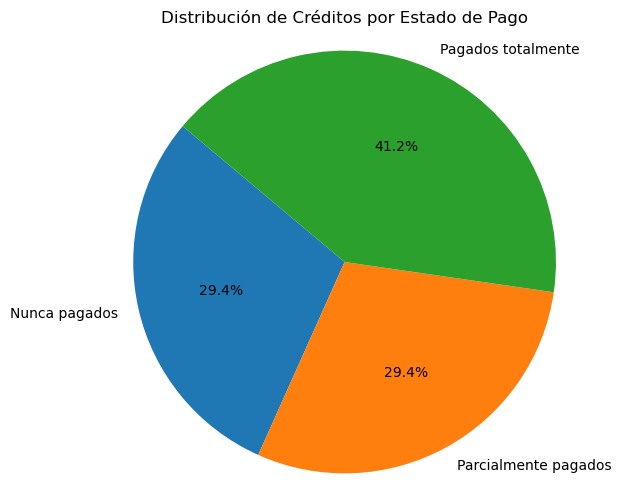

In [41]:
import matplotlib.pyplot as plt

estados = ['Nunca pagados', 'Parcialmente pagados', 'Pagados totalmente']
valores = [
    creditos_nunca_pagados,
    creditos_con_pagos - pagos_totales,
    pagos_totales
]

plt.figure(figsize=(6, 6))
plt.pie(valores, labels=estados, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Créditos por Estado de Pago')
plt.axis('equal')
plt.show()


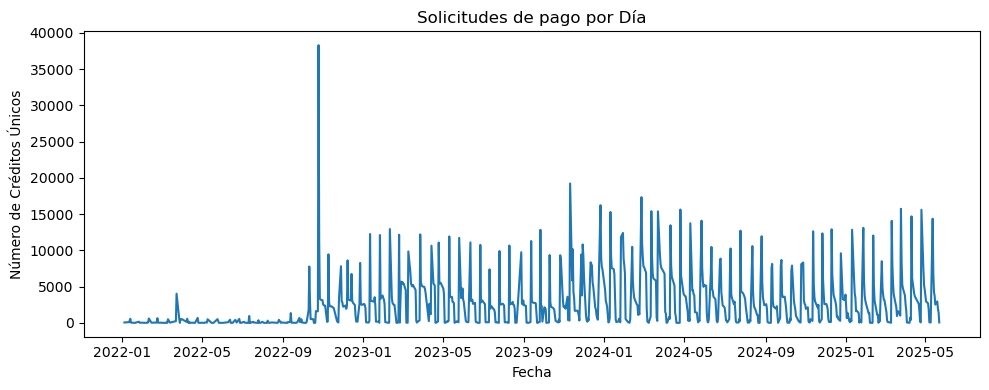

In [48]:
solicitudes_por_dia.plot(kind='line', figsize=(10, 4), title='Solicitudes de pago por Día')
plt.xlabel('Fecha')
plt.ylabel('Número de Créditos Únicos')
plt.tight_layout()
plt.show()


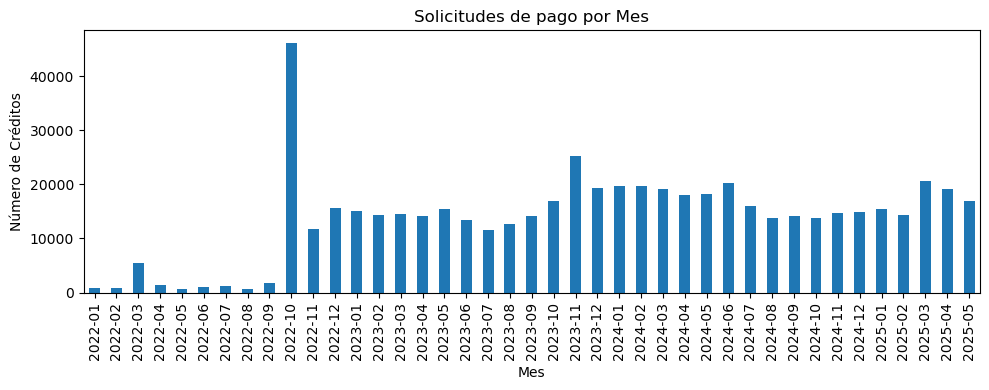

In [49]:
solicitudes_por_mes.plot(kind='bar', figsize=(10, 4), title='Solicitudes de pago por Mes')
plt.xlabel('Mes')
plt.ylabel('Número de Créditos')
plt.tight_layout()
plt.show()


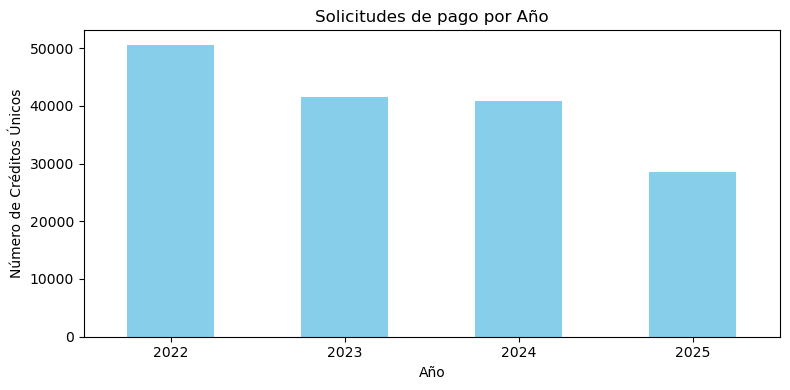

In [50]:
solicitudes_por_ano = df_lista.groupby(df_lista['fechaEnvioCobro'].dt.year)['idCredito'].nunique()

# Graficar
plt.figure(figsize=(8,4))
solicitudes_por_ano.plot(kind='bar', color='skyblue')
plt.title('Solicitudes de pago por Año')
plt.xlabel('Año')
plt.ylabel('Número de Créditos Únicos')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

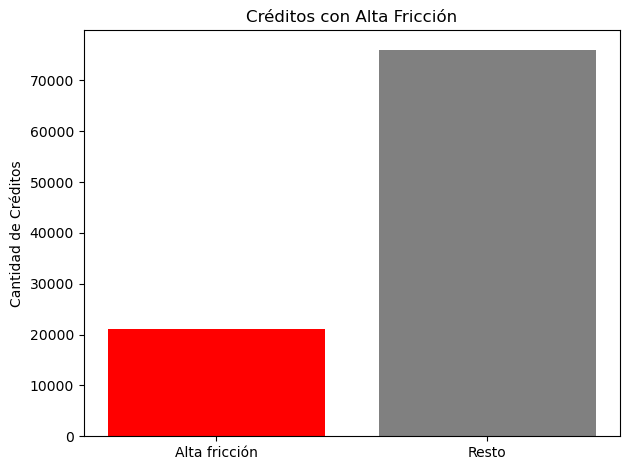

In [ ]:
friccion_labels = ['Alta fricción', 'Resto']
friccion_valores = [alta_friccion, len(grupo_cliente) - alta_friccion]

plt.bar(friccion_labels, friccion_valores, color=['red', 'gray'])
plt.title('Créditos con Alta Fricción')
plt.ylabel('Cantidad de Créditos')
plt.tight_layout()
plt.show()

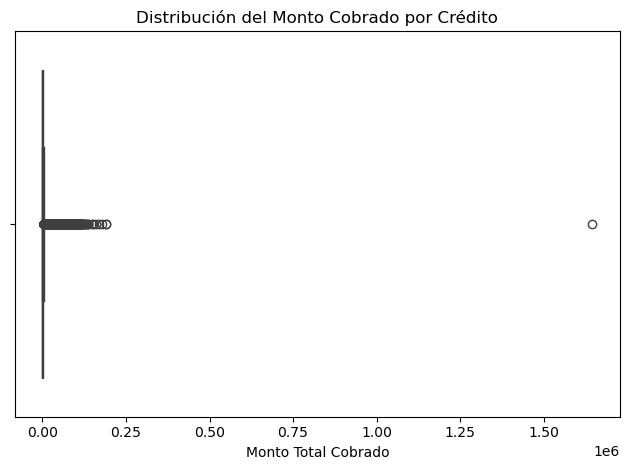

In [ ]:
import seaborn as sns
###HACER BIEN
cobros_por_credito = grupo_cliente['montoCobrado'].sum().reset_index()
sns.boxplot(x=cobros_por_credito['montoCobrado'])
plt.title('Distribución del Monto Cobrado por Crédito')
plt.xlabel('Monto Total Cobrado')
plt.tight_layout()
plt.show()